## Importing the relevant code/libraries

In this code we will use the numpy and matplotlib libraries, as well as code created by the author of the book (nsfg, first,thinkstats2 and thinkplot). Please refer to the original code or the documentation to find out potential useful functions or get started with coding.

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

## Exercise 2-3:

The mode of a distribution is the most frequent value; see
Wikipedia. Write a function called Mode that takes a Hist and
returns the most frequent value.


Step 1: let's try to get familiar with Hist and understand how it works. For this I go to the examples of chapter 2.

We already imported the database (import nsfg), but I don't remember how the db works. I go to the nsfg source code and I find this function: 

In [2]:
# so I try...
database = nsfg.ReadFemPreg()

The source code also tells me that this function returns a dataframe, so I google how dataframes work in Python. I find out there is a simple method to check the name of all the columns of the dataframe, that can be useful!

In [6]:
columns = database.columns

In [7]:
print(columns)

Index(['caseid', 'pregordr', 'howpreg_n', 'howpreg_p', 'moscurrp', 'nowprgdk',
       'pregend1', 'pregend2', 'nbrnaliv', 'multbrth',
       ...
       'laborfor_i', 'religion_i', 'metro_i', 'basewgt', 'adj_mod_basewgt',
       'finalwgt', 'secu_p', 'sest', 'cmintvw', 'totalwgt_lb'],
      dtype='object', length=244)


Now that I remember a bit how the db works, I can go to chapter 2 and check again how to work with Hist.

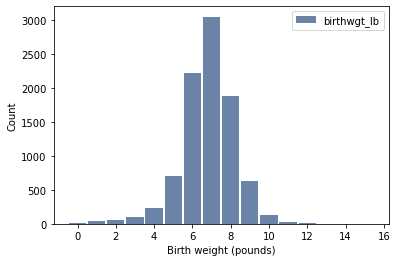

In [8]:
preg = nsfg.ReadFemPreg() #reload the database with the same name that the author uses, for simplicity
live = preg[preg.outcome == 1] # get only alive babies
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb') # save the histogram object in a variable hist
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

The assignment asks to find the most frequent value, but that means that I have to get all the frequencies from the histogram and find the maximum, of course I want to know to which value every frequency is associated.

In [9]:
hist.Items()

dict_items([(7.0, 3049), (6.0, 2223), (8.0, 1889), (5.0, 697), (9.0, 623), (4.0, 229), (10.0, 132), (3.0, 98), (2.0, 53), (1.0, 40), (11.0, 26), (12.0, 10), (0.0, 8), (14.0, 3), (13.0, 3), (15.0, 1)])

In [35]:
max_freq = -1 # initialize the max to an impossibly low value
for value,freq in hist.Items():
    if freq >= max_freq:
        max_freq = freq
        value_of_max_freq = value
print(max_freq)
print(value_of_max_freq)
    

3049
7.0


In [42]:
alternative_max = max((freq, value) for value,freq in hist.Items())

Now I am pretty sure there should be a pre-made method to find the maximum number in a list in python

In [43]:
alternative_max

(3049, 7.0)

In [51]:
def Mode(hist):
    max_freq = -1
    for value,freq in hist.Items():
        if freq >= max_freq:
            max_freq = freq
            value_of_max_freq = value
    return (max_freq,value_of_max_freq)

In [52]:
Mode(hist)

(3049, 7.0)

In [68]:
max_freq = -1 # initialize the max to an impossibly low value
list_values = list()
for value,freq in hist.Items():
    if freq >= max_freq:
        list_values = [(value, freq)] + list_values
        max_freq = freq
    else:
        list_values = list_values + [(value, freq)]
print(list_values)

[(7.0, 3049), (6.0, 2223), (8.0, 1889), (5.0, 697), (9.0, 623), (4.0, 229), (10.0, 132), (3.0, 98), (2.0, 53), (1.0, 40), (11.0, 26), (12.0, 10), (0.0, 8), (14.0, 3), (13.0, 3), (15.0, 1)]


## Addition to exercise by Stella

Once you completed exercise 2-3, create the code that calculates the skewness and kurtosis of the "preglen" variable distribution. What can you say about this distribution? Represent your findings using a boxplot (use the pandas library as shown in the extract from Bruce, P., Bruce, A., & Gedeck, P. (2020). Practical statistics for data scientists: 50+ essential concepts using R and Python. O'Reilly Media).

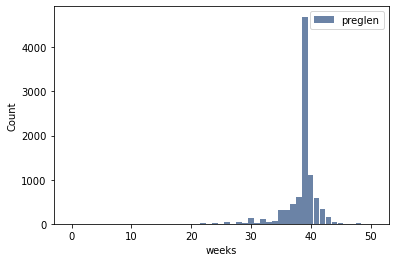

In [69]:
preglen = np.floor(live.prglngth)
hist = thinkstats2.Hist(preglen, label='preglen')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='weeks', ylabel='Count')

In [74]:
from scipy.stats import skew, kurtosis
skew(preglen)
kurtosis (preglen)

17.768148860362405

Use the formulas and try to calculate the skewness manually.

## Exercise 3-2